In [3]:
# In[1]:

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils


import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *

import numpy as np
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.preprocessing.image import  img_to_array
from keras import backend as K
K.set_image_dim_ordering('th')

import numpy as np

# Image manipulations and arranging data
import os
from PIL import Image
import theano
theano.config.optimizer="None"
#Sklearn to modify the data

from sklearn.cross_validation import train_test_split


# input image dimensions

# In[8]:

path=('/home/krishna/ML/ocd/resiz')  #path of resized images
p1=('/home/krishna/ML/ocd/train_cancer')
p2=('/home/krishna/ML/ocd/validation')
imlist = os.listdir(path)
#print(imlist)
im1 = array(Image.open(path+'//'+ imlist[0]))
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images
print(m,n)

185 273


In [4]:
# In[13]:

train_data_dir = p1
validation_data_dir = p2
datagen = ImageDataGenerator(rescale=1./255)
img_width=400
img_height=400
# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

Found 195 images belonging to 2 classes.


In [13]:
# In[11]:

m=150
n=150
print(p1)
classes=os.listdir(p1)
print(classes)
x=[]
y=[]
for fol in classes:
    #print(fol)
    imgfiles=os.listdir(p1+'//'+fol);
    for img in imgfiles:
        im=Image.open(p1+'//'+fol+'//'+img);
        im=im.convert(mode='RGB')
        imrs=im.resize((m,n))
        imrs=img_to_array(imrs)/255;
        imrs=imrs.transpose(2,0,1);
        imrs=imrs.reshape(3,m,n);
        x.append(imrs)
        y.append(fol)
#print(x) 
x=np.array(x);
y=np.array(y);
#print(classes[0])


/home/krishna/ML/ocd/train_cancer
['no_cancer', 'cancer']


In [14]:
# In[12]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=None)
print(x_train.shape[1:])
print(y_test)

# In[29]:

batch_size=6
nb_classes=len(classes)
nb_epoch=10
nb_pool=2
nb_conv=5

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=None)

uniques, id_train=np.unique(y_train,return_inverse=True)
Y_train=np_utils.to_categorical(id_train,nb_classes)
uniques, id_test=np.unique(y_test,return_inverse=True)
Y_test=np_utils.to_categorical(id_test,nb_classes)

model= Sequential()
nb_filters=32
model.add(Convolution2D(nb_filters,nb_conv,nb_conv,border_mode='same',input_shape=x_train.shape[1:]))

model.add(Activation('relu'));
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
nb_filters=64
model.add(Convolution2D(nb_filters,nb_conv,nb_conv));
model.add(Activation('relu'));
model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)));
nb_filters=128
model.add(Convolution2D(nb_filters,nb_conv,nb_conv));
model.add(Activation('relu'));
model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)));

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
'''
model.add(Dropout(0.5));
model.add(Flatten());
model.add(Dense(186));
model.add(Dropout(0.5));
model.add(Dense(nb_classes));
model.add(Activation('softmax'));
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
'''

model.fit(x_train,Y_train,batch_size=batch_size,nb_epoch=nb_epoch,verbose=1,validation_data=(x_test, Y_test))


(3, 150, 150)
['cancer' 'no_cancer' 'cancer' 'cancer' 'cancer' 'cancer' 'no_cancer'
 'no_cancer' 'cancer' 'cancer' 'no_cancer' 'no_cancer' 'no_cancer'
 'no_cancer' 'cancer' 'no_cancer' 'no_cancer' 'cancer' 'cancer'
 'no_cancer' 'cancer' 'cancer' 'no_cancer' 'cancer' 'cancer' 'cancer'
 'no_cancer' 'no_cancer' 'no_cancer' 'cancer' 'no_cancer' 'cancer'
 'no_cancer' 'no_cancer' 'cancer' 'no_cancer' 'cancer' 'cancer'
 'no_cancer' 'cancer' 'no_cancer' 'cancer' 'cancer' 'cancer' 'no_cancer'
 'cancer' 'cancer' 'no_cancer' 'cancer' 'cancer' 'cancer' 'cancer'
 'cancer' 'cancer' 'no_cancer' 'cancer' 'no_cancer' 'no_cancer'
 'no_cancer' 'cancer']


/home/krishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(3, 150, 1..., padding="same")`
/home/krishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5))`
/home/krishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5))`
/home/krishna/anaconda3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 159 samples, validate on 40 samples
Epoch 1/10
159/159 [==============================] - 40s 254ms/step - loss: 6.9826 - acc: 0.5503 - val_loss: 9.2174 - val_acc: 0.4250
Epoch 2/10
159/159 [==============================] - 43s 273ms/step - loss: 7.0064 - acc: 0.5629 - val_loss: 9.2174 - val_acc: 0.4250
Epoch 3/10
159/159 [==============================] - 44s 276ms/step - loss: 7.0067 - acc: 0.5629 - val_loss: 9.2174 - val_acc: 0.4250
Epoch 4/10
159/159 [==============================] - 44s 275ms/step - loss: 7.0568 - acc: 0.5597 - val_loss: 9.2174 - val_acc: 0.4250
Epoch 5/10
159/159 [==============================] - 44s 275ms/step - loss: 7.0573 - acc: 0.5597 - val_loss: 9.2174 - val_acc: 0.4250
Epoch 6/10
159/159 [==============================] - 44s 276ms/step - loss: 7.0562 - acc: 0.5597 - val_loss: 9.2174 - val_acc: 0.4250
Epoch 7/10
159/159 [==============================] - 44s 275ms/step - loss: 6.0839 - acc: 0.5660 - val_loss: 1.4426 - val_acc: 0.4250
Epoch 8/10

In [15]:
# In[46]:

#saving model in json
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [16]:
 


# In[3]:

from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


['no_cancer', 'cancer']
no_cancer --> 0.52774936
cancer --> 0.46369448
{'no_cancer': 0.52774936, 'cancer': 0.46369448}


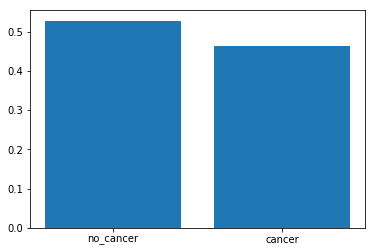

In [20]:



# In[4]:

loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# In[15]:
import matplotlib.pyplot as plt
m=150
n=150
classes=os.listdir(p1)
im = Image.open('/home/krishna/ML/ocd/test_cancer/test.jpeg');
imrs = im.resize((m,n))
imrs=img_to_array(imrs)/255;
imrs=imrs.transpose(2,0,1);
imrs=imrs.reshape(3,m,n);
print(classes)
#print(imrs)
x=[]
x.append(imrs)
x=np.array(x);
predictions = loaded_model.predict(x)
#print(predictions)
out={}
for i in range(2):
    print("%s --> %s"%(classes[i],predictions[0][i]))
    out[classes[i]]=(predictions[0][i])
#print(out)
import operator
sorted_x =out
z=sorted(out.items(), key=operator.itemgetter(1),reverse=True)
print(out)
plt.bar(range(len(sorted_x)), list(sorted_x.values()), align='center')
plt.xticks(range(len(sorted_x)), list(sorted_x.keys()))
plt.show()


# In[11]:

im=Image.open('/home/krishna/ML/ocd/test/test.jpg');
im=im.convert(mode='RGB')
imrs=im.resize((m,n))
imrs=img_to_array(imrs)/255;
#print(imrs)
imrs=imrs.transpose(2,0,1);
imrs=imrs.reshape(3,m,n);
#print(imrs)

